In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [ ]:
data_241 = pd.read_csv('./Data/NA241.csv')
data_241.set_index('PSNO_NA_ECP', inplace=True)
data_241 = data_241.sort_index()
yellow = '#FFC300'
blue = '#00b0be' 
pink = '#f45f74' 
orange = '#FF5F1F'
light_blue = '#8fd7d7'
light_pink = '#ff8ca1'

## **Graph 1**
Number of Polling Stations won by each candidate in General Elections 2024 in NA-241 (Based on ECP Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_22467/1589476459.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


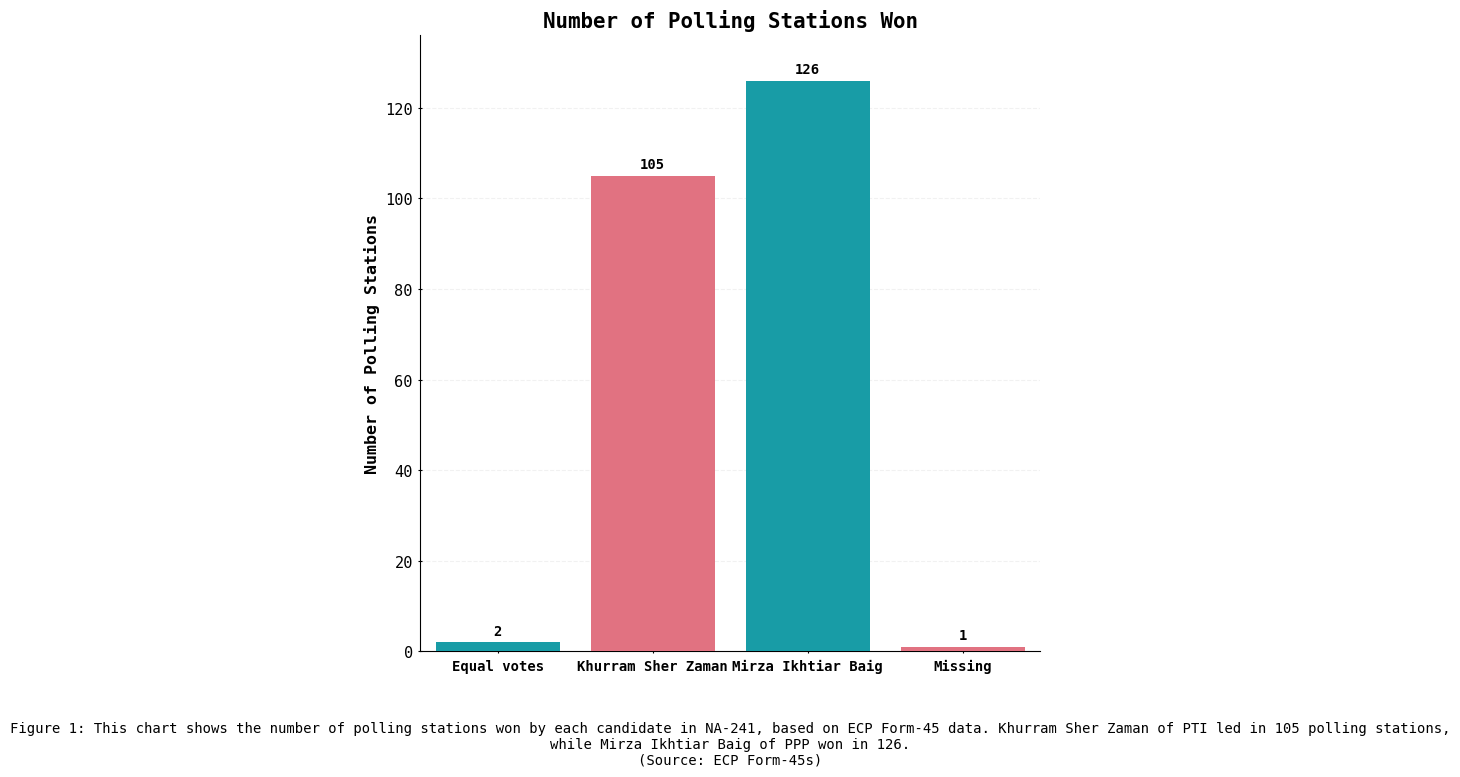

In [30]:
font_family = 'monospace'
sns.set_style({
    'axes.facecolor': 'none',
    'grid.color': 'lightgrey',
    'axes.edgecolor': 'black',
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': True,
    'ytick.left': True,
    'font.family': font_family,
    'font.size': 12
})

data_241_ECP_Winner = data_241['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_241_ECP_Winner))]

plt.figure(figsize=(8, 8))
ax = plt.gca()

bars = sns.barplot(
    x=data_241_ECP_Winner.index,
    y=data_241_ECP_Winner.values,
    hue=data_241_ECP_Winner.index,
    legend=False,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_241_ECP_Winner.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold', ha='center')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.text(
    0.5, -0.15,
    'Figure 1: This chart shows the number of polling stations won by each candidate in NA-241, based on ECP Form-45 data. Khurram Sher Zaman of PTI led in 105 polling stations,\n' 
    'while Mirza Ikhtiar Baig of PPP won in 126.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=plt.gca().transAxes
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_1.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 2**
Number of Votes received by each candidate in General Elections 2024 in NA-241 (Based on ECP Form-45s)


/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_22467/1474471798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_241_votes_ecp['OPP_VOTES_ECP'] = pd.to_numeric(data_241_votes_ecp['OPP_VOTES_ECP'], errors='coerce')
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_22467/1474471798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_241_votes_ecp['PTI_VOTES_ECP'] = pd.to_numeric(data_241_votes_ecp['PTI_VOTES_ECP'], errors='coerce')
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000

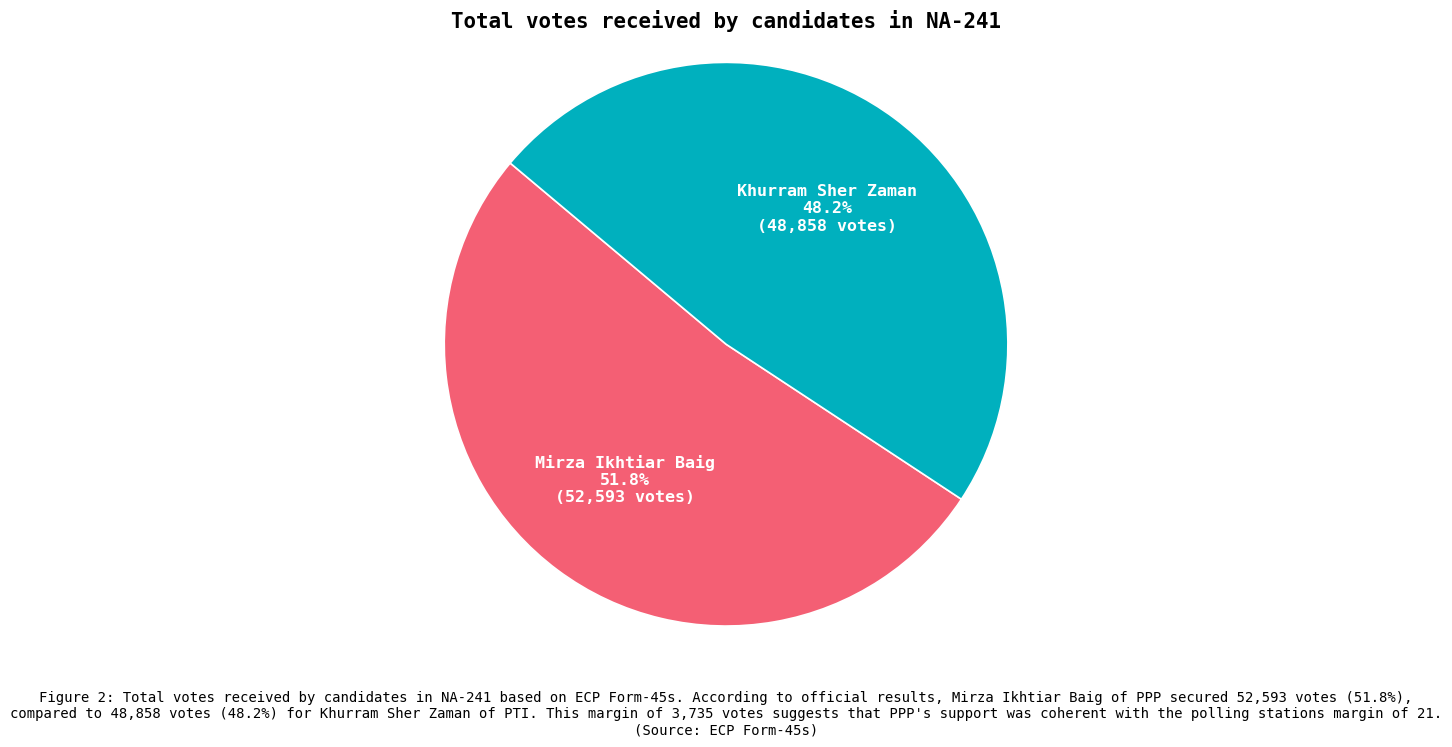

In [31]:
data_241_votes_ecp = data_241[['OPP_VOTES_ECP', 'PTI_VOTES_ECP']]
data_241_votes_ecp['OPP_VOTES_ECP'] = pd.to_numeric(data_241_votes_ecp['OPP_VOTES_ECP'], errors='coerce')
data_241_votes_ecp['PTI_VOTES_ECP'] = pd.to_numeric(data_241_votes_ecp['PTI_VOTES_ECP'], errors='coerce')
data_241_votes_ecp = data_241_votes_ecp.sum()
data_241_votes_ecp.index = ['Mirza Ikhtiar Baig', 'Khurram Sher Zaman']
candidate_colors = {
    'Mirza Ikhtiar Baig': pink,
    'Khurram Sher Zaman': blue
}
colors = [candidate_colors[name] for name in data_241_votes_ecp.index]
labels = data_241_votes_ecp.index
values = data_241_votes_ecp.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-241', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
plt.text(
    0.5, -0.1,
    'Figure 2: Total votes received by candidates in NA-241 based on ECP Form-45s. According to official results, Mirza Ikhtiar Baig of PPP secured 52,593 votes (51.8%),\n'
    'compared to 48,858 votes (48.2%) for Khurram Sher Zaman of PTI. This margin of 3,735 votes suggests that PPP\'s support was coherent with the polling stations margin of 21.\n(Source: ECP Form-45s)',
    wrap=False,
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_2.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 3**
Distribution of Turnout percentages in General Elections 2024 in NA-241 (Based on ECP Form-45s) NA

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_22467/441554175.py:26: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_22467/441554175.py:26: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


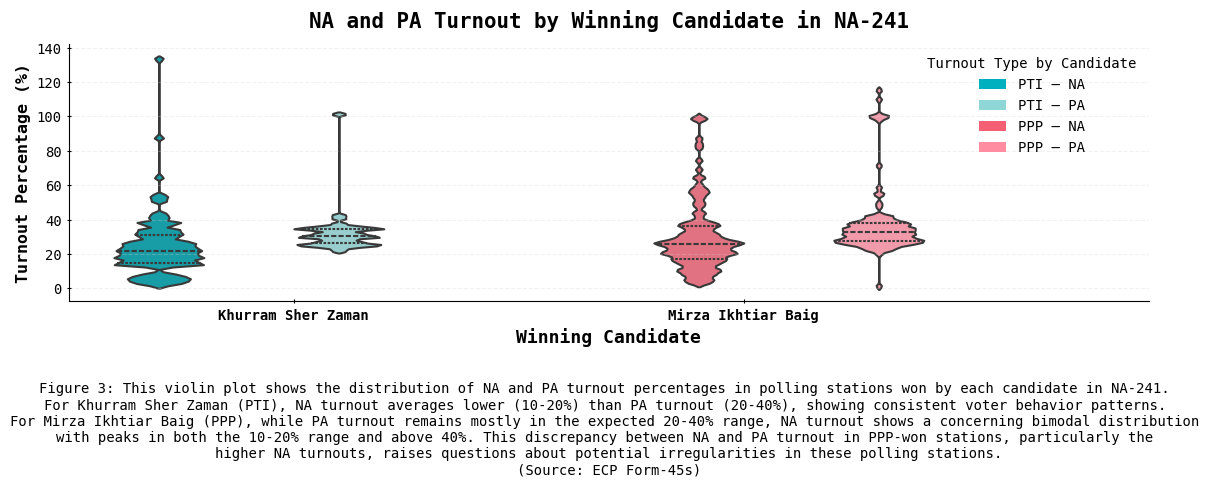

In [34]:
df_long = data_241[['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP']].copy()
df_long['WINNER_ECP'] = df_long['WINNER_ECP'].replace({
    'Equal votes': np.nan,
    'Missing': np.nan,
})
df_long = df_long.melt(
    id_vars='WINNER_ECP',
    value_vars=['TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'],
    var_name='Turnout Type',
    value_name='Turnout Percentage'
    )
df_long['Turnout Type'] = df_long['Turnout Type'].str.replace('TURNOUT_', '').str.replace('_PERCENTAGE_ECP', '')
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].replace('#VALUE!', np.nan)
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].astype(float)
df_long.dropna(inplace=True)

# Define colors for the violin plot
palette = {
    ('Khurram Sher Zaman', 'NA'): blue,
    ('Khurram Sher Zaman', 'PA'): light_blue,
    ('Mirza Ikhtiar Baig', 'NA'): pink,
    ('Mirza Ikhtiar Baig', 'PA'): light_pink
}
df_long['Hue Group'] = list(zip(df_long['WINNER_ECP'], df_long['Turnout Type']))
plt.figure(figsize=(13, 6))
ax = sns.violinplot(
    x='WINNER_ECP',
    y='Turnout Percentage',
    hue='Hue Group',
    data=df_long,
    palette=palette,
    inner='quartile',
    linewidth=1.5,
    scale='width',
    bw=0.05,
    dodge=True
)

plt.xlabel('Winning Candidate', fontsize=13, fontweight='bold')
plt.ylabel('Turnout Percentage (%)', fontsize=12, fontweight='bold')
plt.title('NA and PA Turnout by Winning Candidate in NA-241', fontsize=15, fontweight='bold', pad=12)
plt.xticks(fontsize=10, fontweight='semibold')
plt.yticks(fontsize=10)
plt.xlim(-0.5, 1.9)
ax.grid(axis='y', linestyle='--', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=blue, label='PTI – NA'),
    Patch(facecolor=light_blue, label='PTI – PA'),
    Patch(facecolor=pink, label='PPP – NA'),
    Patch(facecolor=light_pink, label='PPP – PA')
]
ax.legend(handles=legend_elements, title='Turnout Type by Candidate', loc='upper right', frameon=False)

plt.text(
    0.5, -0.5,
    'Figure 3: This violin plot shows the distribution of NA and PA turnout percentages in polling stations won by each candidate in NA-241. \n'
    'For Khurram Sher Zaman (PTI), NA turnout averages lower (10-20%) than PA turnout (20-40%), showing consistent voter behavior patterns. \n'
    'For Mirza Ikhtiar Baig (PPP), while PA turnout remains mostly in the expected 20-40% range, NA turnout shows a concerning bimodal distribution \n'
    'with peaks in both the 10-20% range and above 40%. This discrepancy between NA and PA turnout in PPP-won stations, particularly the \n'
    'higher NA turnouts, raises questions about potential irregularities in these polling stations.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=ax.transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_3.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 4**
Number of polling stations won by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s) where turnout difference between NA and PA was more than 50 votes

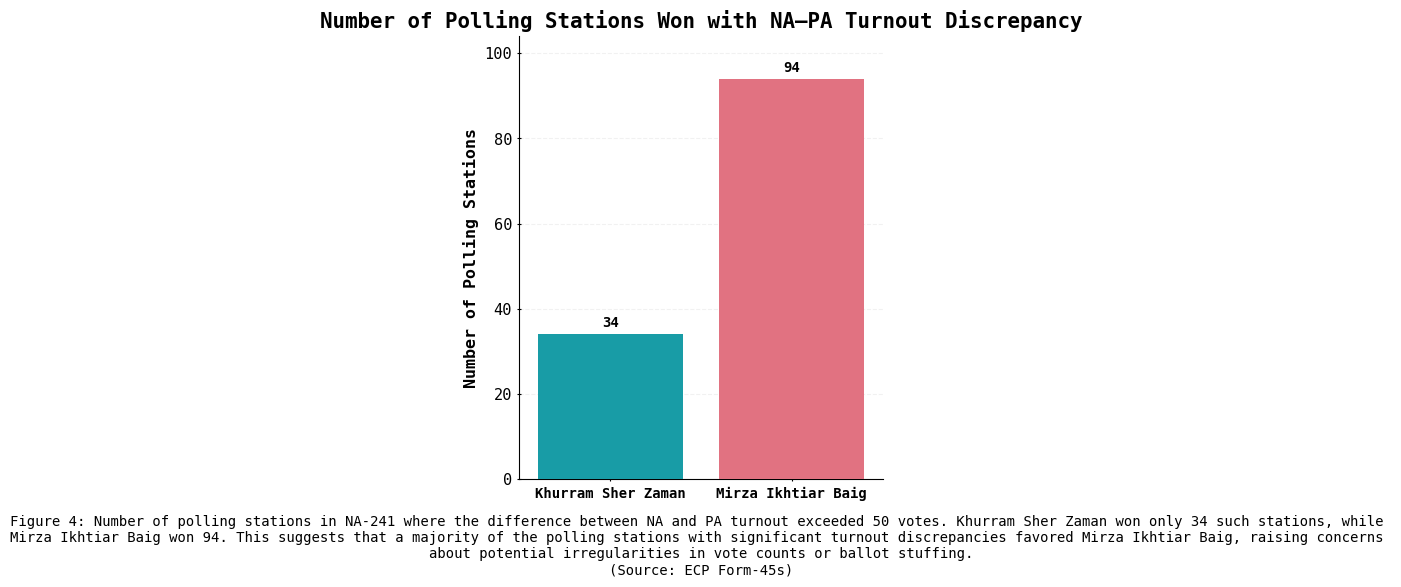

In [35]:

data_241_Discrepency = data_241[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_241_Discrepency['WINNER_ECP'] = data_241_Discrepency['WINNER_ECP'].replace({
    'Equal votes': np.nan,
    'Missing': np.nan,
})
data_241_Discrepency['TURNOUT_DIFFERENCE'] = pd.to_numeric(data_241_Discrepency['TURNOUT_DIFFERENCE'], errors='coerce')
data_241_Discrepency = data_241_Discrepency.dropna()
data_241_Discrepency = data_241_Discrepency[abs(data_241_Discrepency['TURNOUT_DIFFERENCE']) >= 50]

data_241_ECP_Winner_discrepency = data_241_Discrepency['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_241_ECP_Winner_discrepency))]

plt.figure(figsize=(10, 6))
ax = plt.gca()

bars = sns.barplot(
    x=data_241_ECP_Winner_discrepency.index,
    y=data_241_ECP_Winner_discrepency.values,
    hue=data_241_ECP_Winner_discrepency.index,
    
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won with NA–PA Turnout Discrepancy', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_241_ECP_Winner_discrepency.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.text(
    0.5, -0.15,
    'Figure 4: Number of polling stations in NA-241 where the difference between NA and PA turnout exceeded 50 votes. Khurram Sher Zaman won only 34 such stations, while \n'
    'Mirza Ikhtiar Baig won 94. This suggests that a majority of the polling stations with significant turnout discrepancies favored Mirza Ikhtiar Baig, raising concerns \n'
    'about potential irregularities in vote counts or ballot stuffing.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_4.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 5**
This shows the distribution of absolute turnout differences between NA and PA polling stations in General Elections 2024 in NA-242 (Based on ECP Form-45s)

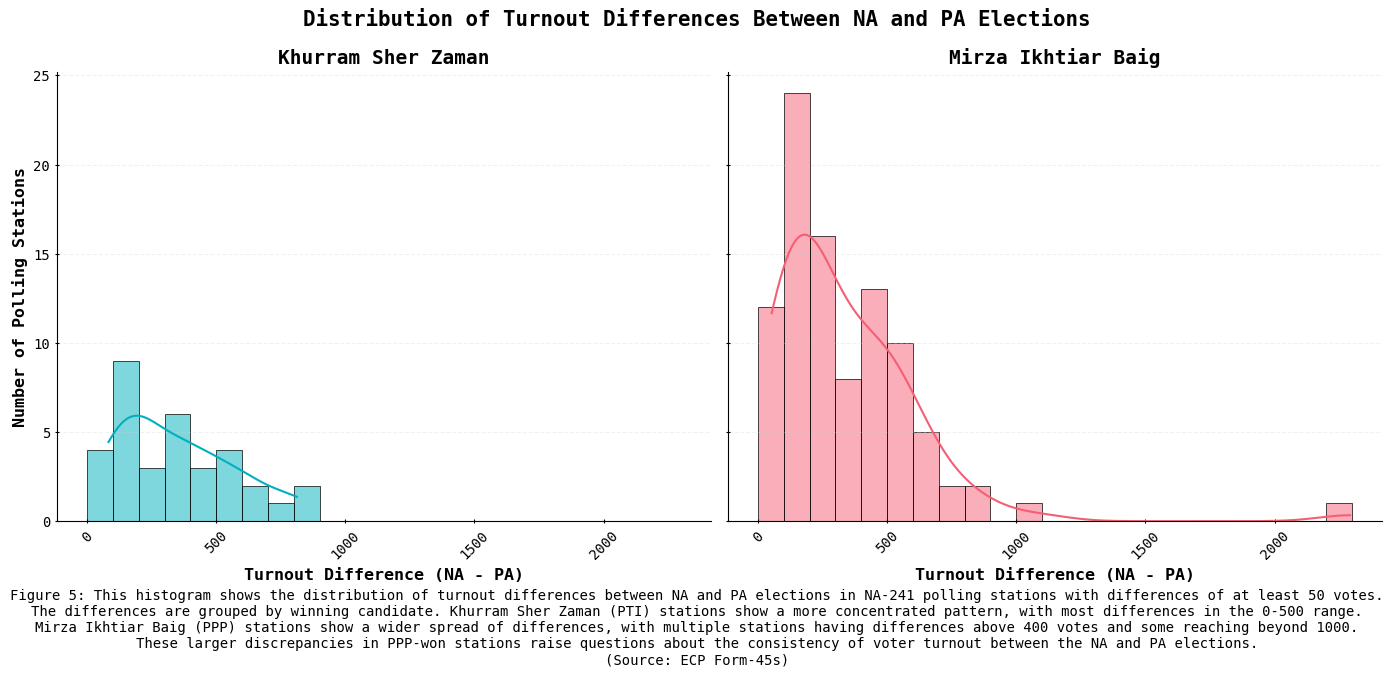

In [37]:
data_241_discrepency = data_241[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_241_discrepency['WINNER_ECP'] = data_241_discrepency['WINNER_ECP'].replace({
    'Equal votes': np.nan,
    'Missing': np.nan,
})
data_241_discrepency['TURNOUT_DIFFERENCE'] = pd.to_numeric(data_241_discrepency['TURNOUT_DIFFERENCE'], errors='coerce')
data_241_discrepency = data_241_discrepency.dropna()

data_241_discrepency = data_241_discrepency[abs(data_241_discrepency['TURNOUT_DIFFERENCE']) >= 50]

min_diff = (data_241_discrepency['TURNOUT_DIFFERENCE'].min() // 100) * 100
max_diff = (data_241_discrepency['TURNOUT_DIFFERENCE'].max() // 100 + 1) * 100
bin_edges = np.arange(min_diff, max_diff + 100, 100)

candidates = data_241_discrepency['WINNER_ECP'].unique()
candidate_data = {candidate: data_241_discrepency[data_241_discrepency['WINNER_ECP'] == candidate] for candidate in candidates}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = [blue, pink] 
for i, (candidate, subset) in enumerate(sorted(candidate_data.items())):
    sns.histplot(
        data=subset,
        x='TURNOUT_DIFFERENCE',
        bins=bin_edges,
        kde=True,
        color=colors[i % len(colors)],
        edgecolor='black',
        linewidth=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'{candidate}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Turnout Difference (NA - PA)', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

axes[0].set_ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')


plt.suptitle('Distribution of Turnout Differences Between NA and PA Elections', fontsize=15, fontweight='bold', color='black', y=0.98)

plt.figtext(
    0.5, -0.05,
    'Figure 5: This histogram shows the distribution of turnout differences between NA and PA elections in NA-241 polling stations with differences of at least 50 votes.\n'
    'The differences are grouped by winning candidate. Khurram Sher Zaman (PTI) stations show a more concentrated pattern, with most differences in the 0-500 range.\n'
    'Mirza Ikhtiar Baig (PPP) stations show a wider spread of differences, with multiple stations having differences above 400 votes and some reaching beyond 1000.\n'
    'These larger discrepancies in PPP-won stations raise questions about the consistency of voter turnout between the NA and PA elections.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=True
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_5.png', dpi=600, bbox_inches='tight')
plt.show()

# **PTI Form 45s**

## **Graph 6**
This graph shows the number of polling stations won by the candidates in General Elections 2024 in NA-242 (Based on PTI Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_22467/3408044590.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


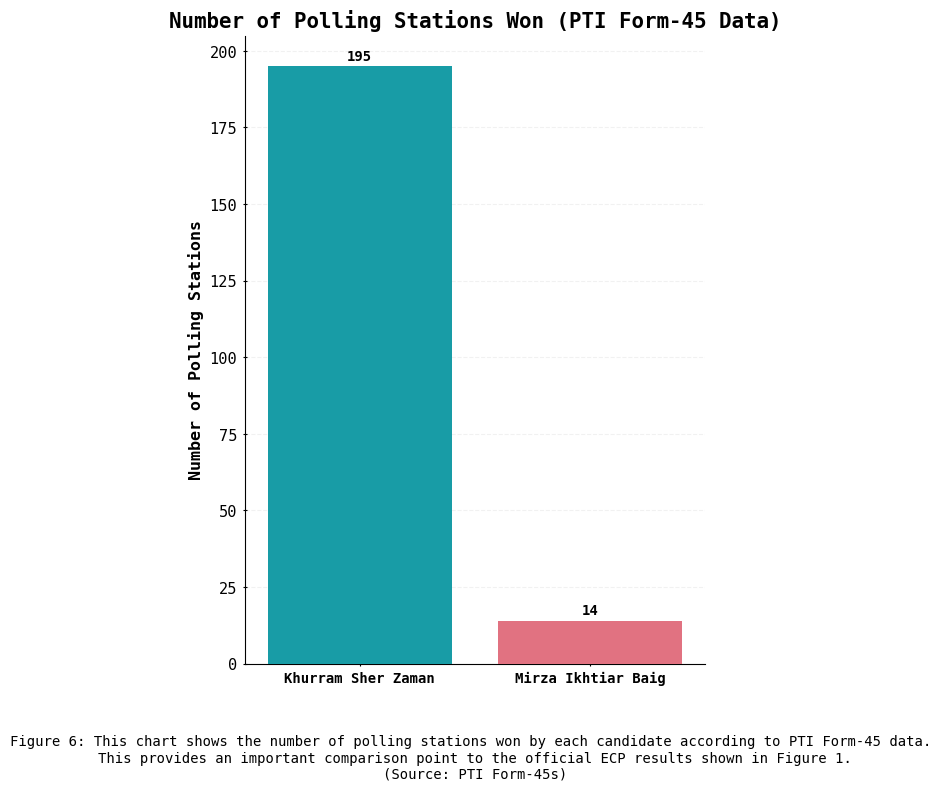

In [38]:
data_241_pti = data_241[['OPP_VOTES_PTI', 'PTI_VOTES_PTI']].copy()
data_241_pti['OPP_VOTES_PTI_NUM'] = pd.to_numeric(data_241_pti['OPP_VOTES_PTI'], errors='coerce')
data_241_pti['PTI_VOTES_PTI_NUM'] = pd.to_numeric(data_241_pti['PTI_VOTES_PTI'], errors='coerce')
data_241_pti = data_241_pti.dropna(subset=['OPP_VOTES_PTI_NUM', 'PTI_VOTES_PTI_NUM'])
data_241_pti['PTI_WINNER'] = np.where(
    data_241_pti['PTI_VOTES_PTI_NUM'] > data_241_pti['OPP_VOTES_PTI_NUM'],
    'Khurram Sher Zaman',
    'Mirza Ikhtiar Baig'  
)

pti_winner_counts = data_241_pti['PTI_WINNER'].value_counts()
plt.figure(figsize=(8, 8))
ax = plt.gca()

colors = [blue if x == 'Khurram Sher Zaman' else pink for x in pti_winner_counts.index]

bars = sns.barplot(
    x=pti_winner_counts.index,
    y=pti_winner_counts.values,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )

plt.title('Number of Polling Stations Won (PTI Form-45 Data)', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(pti_winner_counts.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.text(
    0.5, -0.15,
    'Figure 6: This chart shows the number of polling stations won by each candidate according to PTI Form-45 data. \n'
    'This provides an important comparison point to the official ECP results shown in Figure 1.\n(Source: PTI Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_6.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 7**
This shows the number of votes received by each candidate in General Elections 2024 in NA-242 (Based on PTI Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_22467/1299414793.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


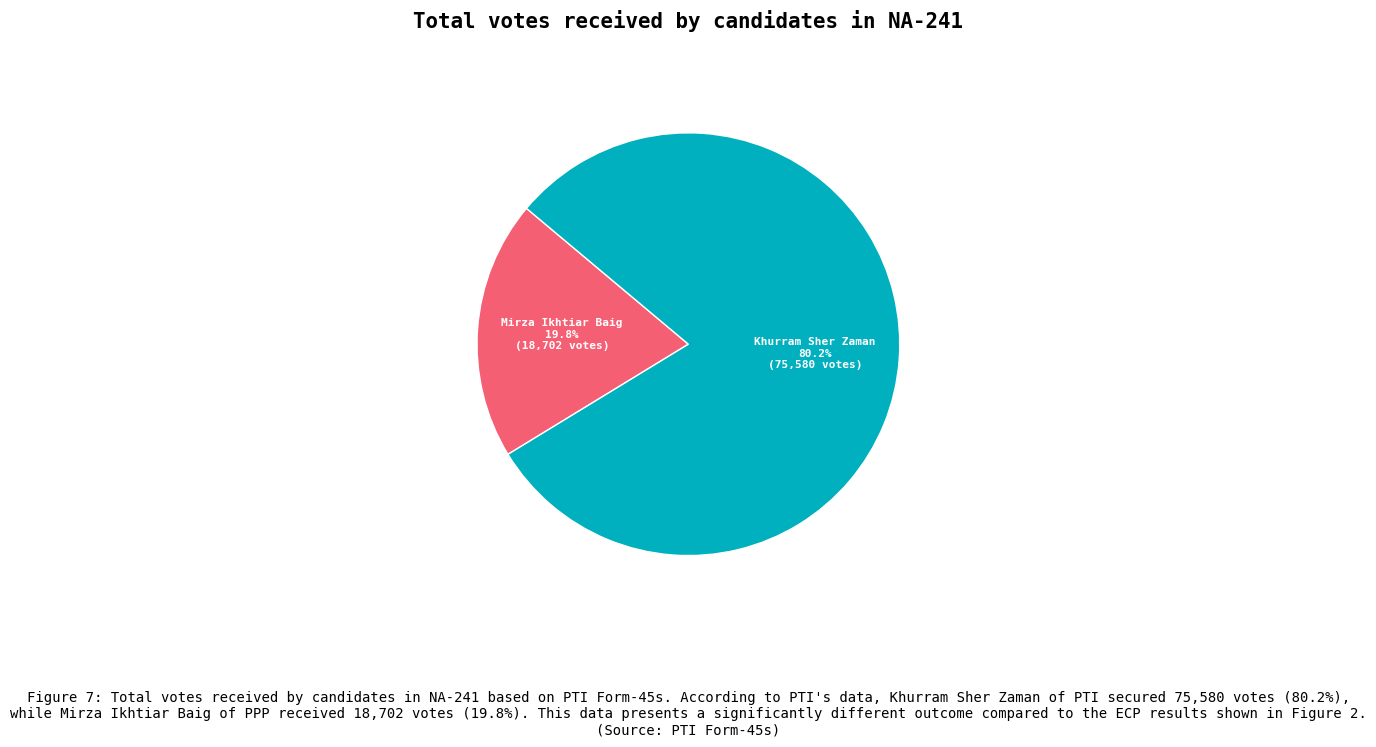

In [39]:
data_241_votes_pti = data_241_pti[['OPP_VOTES_PTI_NUM', 'PTI_VOTES_PTI_NUM']].sum()
data_241_votes_pti.index = ['Mirza Ikhtiar Baig', 'Khurram Sher Zaman']
candidate_colors = {
    'Mirza Ikhtiar Baig': pink,
    'Khurram Sher Zaman': blue
}
colors = [candidate_colors[name] for name in data_241_votes_pti.index]
labels = data_241_votes_pti.index
values = data_241_votes_pti.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(6, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 8, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-241', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
plt.text(
    0.5, -0.1,
    'Figure 7: Total votes received by candidates in NA-241 based on PTI Form-45s. According to PTI\'s data, Khurram Sher Zaman of PTI secured 75,580 votes (80.2%),\n'
    'while Mirza Ikhtiar Baig of PPP received 18,702 votes (19.8%). This data presents a significantly different outcome compared to the ECP results shown in Figure 2.\n(Source: PTI Form-45s)',
    wrap=False,
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_7.png', dpi=600, bbox_inches='tight')
plt.show()